In [1]:
%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

# Example of hemodynamic reponse functions.

---

**Taken and adapted from the nilearn documentation**

See the original [here](https://nilearn.github.io/auto_examples/04_glm_first_level/plot_hrf.html#sphx-glr-auto-examples-04-glm-first-level-plot-hrf-py)

---

Within this example we are going to plot the hemodynamic reponse function (hrf)
model in SPM together with the hrf shape proposed by G.Glover, as well as their
time and dispersion derivatives.

This example requires matplotlib.

The hrf is the filter that couples neural responses to the metabolic-related
changes in the MRI signal.  hrf models are simply phenomenological.

In current analysis frameworks, the choice of hrf model is essentially left to
the user. Fortunately, using the spm or Glover model does not make a huge
difference.  Adding derivatives should be considered whenever timing
information has some degree of uncertainty. It is actually useful to detect
timing issues.


## Set up some parameters for model display

To get an impulse reponse, we simulate a single event occurring at time t=0,
with duration 1s.



In [10]:
import numpy as np

frame_times = np.linspace(0, 33, 331)
onset, amplitude, duration = 0.0, 1.0, 1.0
exp_condition = np.array((onset, duration, amplitude)).reshape(3, 1)

<IPython.core.display.Javascript object>

We sample this on a fris for display



In [12]:
stim = np.zeros_like(frame_times)
stim[(frame_times > onset) * (frame_times <= onset + duration)] = amplitude

<IPython.core.display.Javascript object>

Now we have to define the candidate hrf models.



In [16]:
hrf_models = [None, "spm + derivative", "spm + derivative + dispersion"]

<IPython.core.display.Javascript object>

## Sample the hrf



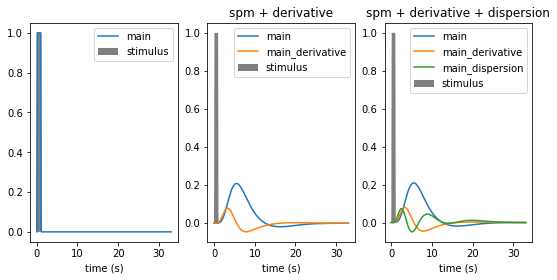

<IPython.core.display.Javascript object>

In [17]:
from nilearn.glm.first_level import compute_regressor
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 4))
for i, hrf_model in enumerate(hrf_models):
    # obtain the signal of interest by convolution
    signal, name = compute_regressor(
        exp_condition, hrf_model, frame_times, con_id="main", oversampling=16
    )

    # plot this
    plt.subplot(1, 3, i + 1)
    plt.fill(frame_times, stim, "k", alpha=0.5, label="stimulus")
    for j in range(signal.shape[1]):
        plt.plot(frame_times, signal.T[j], label=name[j])
    plt.xlabel("time (s)")
    plt.legend(loc=1)
    plt.title(hrf_model)

# adjust the plot
plt.subplots_adjust(bottom=0.12)
plt.show()